In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [ ]:
df.to_csv("BA_reviews.csv")

In [ ]:
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

data = pd.read_csv('BA_reviews.csv', encoding='utf-8')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    return text

data['cleaned_reviews'] = data['reviews'].fillna('').apply(clean_text)

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

data['predicted_sentiment'] = data['cleaned_reviews'].apply(get_sentiment)

positive_reviews = len(data[data['predicted_sentiment'] == 'positive'])
negative_reviews = len(data[data['predicted_sentiment'] == 'negative'])
neutral_reviews = len(data[data['predicted_sentiment'] == 'neutral'])

total_reviews = len(data)
positive_percentage = (positive_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100

print(f"Positive Reviews: {positive_percentage:.2f}%")
print(f"Negative Reviews: {negative_percentage:.2f}%")
print(f"Neutral Reviews: {neutral_percentage:.2f}%")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Positive Reviews: 46.60%
Negative Reviews: 51.50%
Neutral Reviews: 1.90%


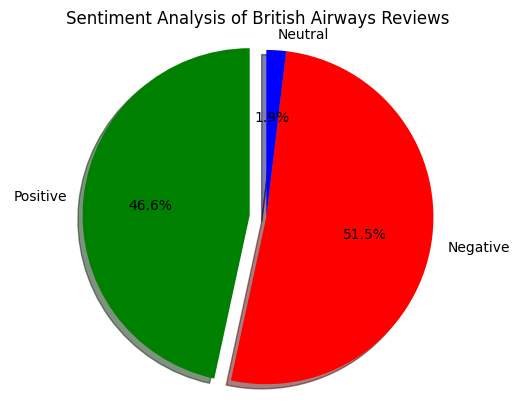

In [ ]:
import matplotlib.pyplot as plt

# Sentiment percentages calculated previously
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)  # Explode the positive slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Analysis of British Airways Reviews')
plt.show()

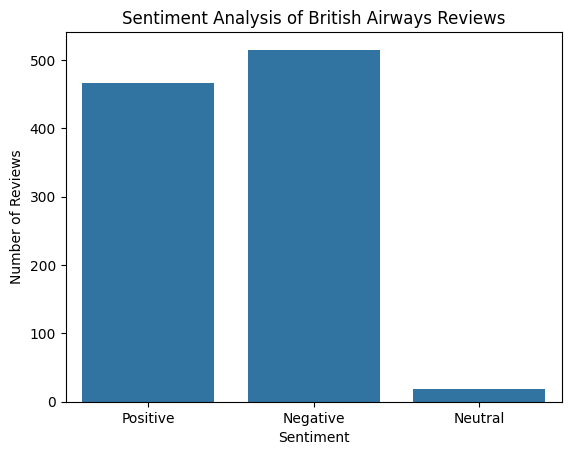

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for sentiment counts
sentiment_counts = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Count': [positive_reviews, negative_reviews, neutral_reviews]
})

# Create the bar chart
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts)
plt.title('Sentiment Analysis of British Airways Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

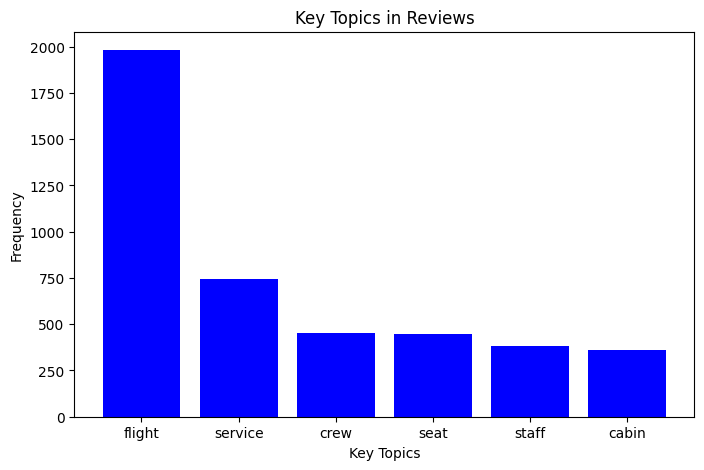

In [ ]:
from collections import Counter
def tokenize(text):
    return text.split()

word_counter = Counter()
data['cleaned_reviews'].apply(lambda x: word_counter.update(tokenize(x)))

key_topics = ['service', 'seat', 'crew', 'staff', 'cabin', 'flight']
topic_counts = {topic: word_counter[topic] for topic in key_topics}

topics, frequencies = zip(*sorted(topic_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(8, 5))
plt.bar(topics, frequencies, color='blue')
plt.xlabel('Key Topics')
plt.ylabel('Frequency')
plt.title('Key Topics in Reviews')
plt.show()